In [8]:
import pandas as pd
df = pd.read_excel('Real estate valuation data set.xlsx')
print(df)


      No  X1 transaction date  X2 house age  \
0      1          2012.916667          32.0   
1      2          2012.916667          19.5   
2      3          2013.583333          13.3   
3      4          2013.500000          13.3   
4      5          2012.833333           5.0   
..   ...                  ...           ...   
409  410          2013.000000          13.7   
410  411          2012.666667           5.6   
411  412          2013.250000          18.8   
412  413          2013.000000           8.1   
413  414          2013.500000           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [9]:
print(df.isnull().sum())


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [70]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']] = scaler.fit_transform(df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']])
print(df)
 

      No  X1 transaction date  X2 house age  \
0      1          2012.916667      0.730594   
1      2          2012.916667      0.445205   
2      3          2013.583333      0.303653   
3      4          2013.500000      0.303653   
4      5          2012.833333      0.114155   
..   ...                  ...           ...   
409  410          2013.000000      0.312785   
410  411          2012.666667      0.127854   
411  412          2013.250000      0.429224   
412  413          2013.000000      0.184932   
413  414          2013.500000      0.148402   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  0.009513                              1.0   
1                                  0.043809                              0.9   
2                                  0.083315                              0.5   
3                                  0.083315                              0.5   
4                                  

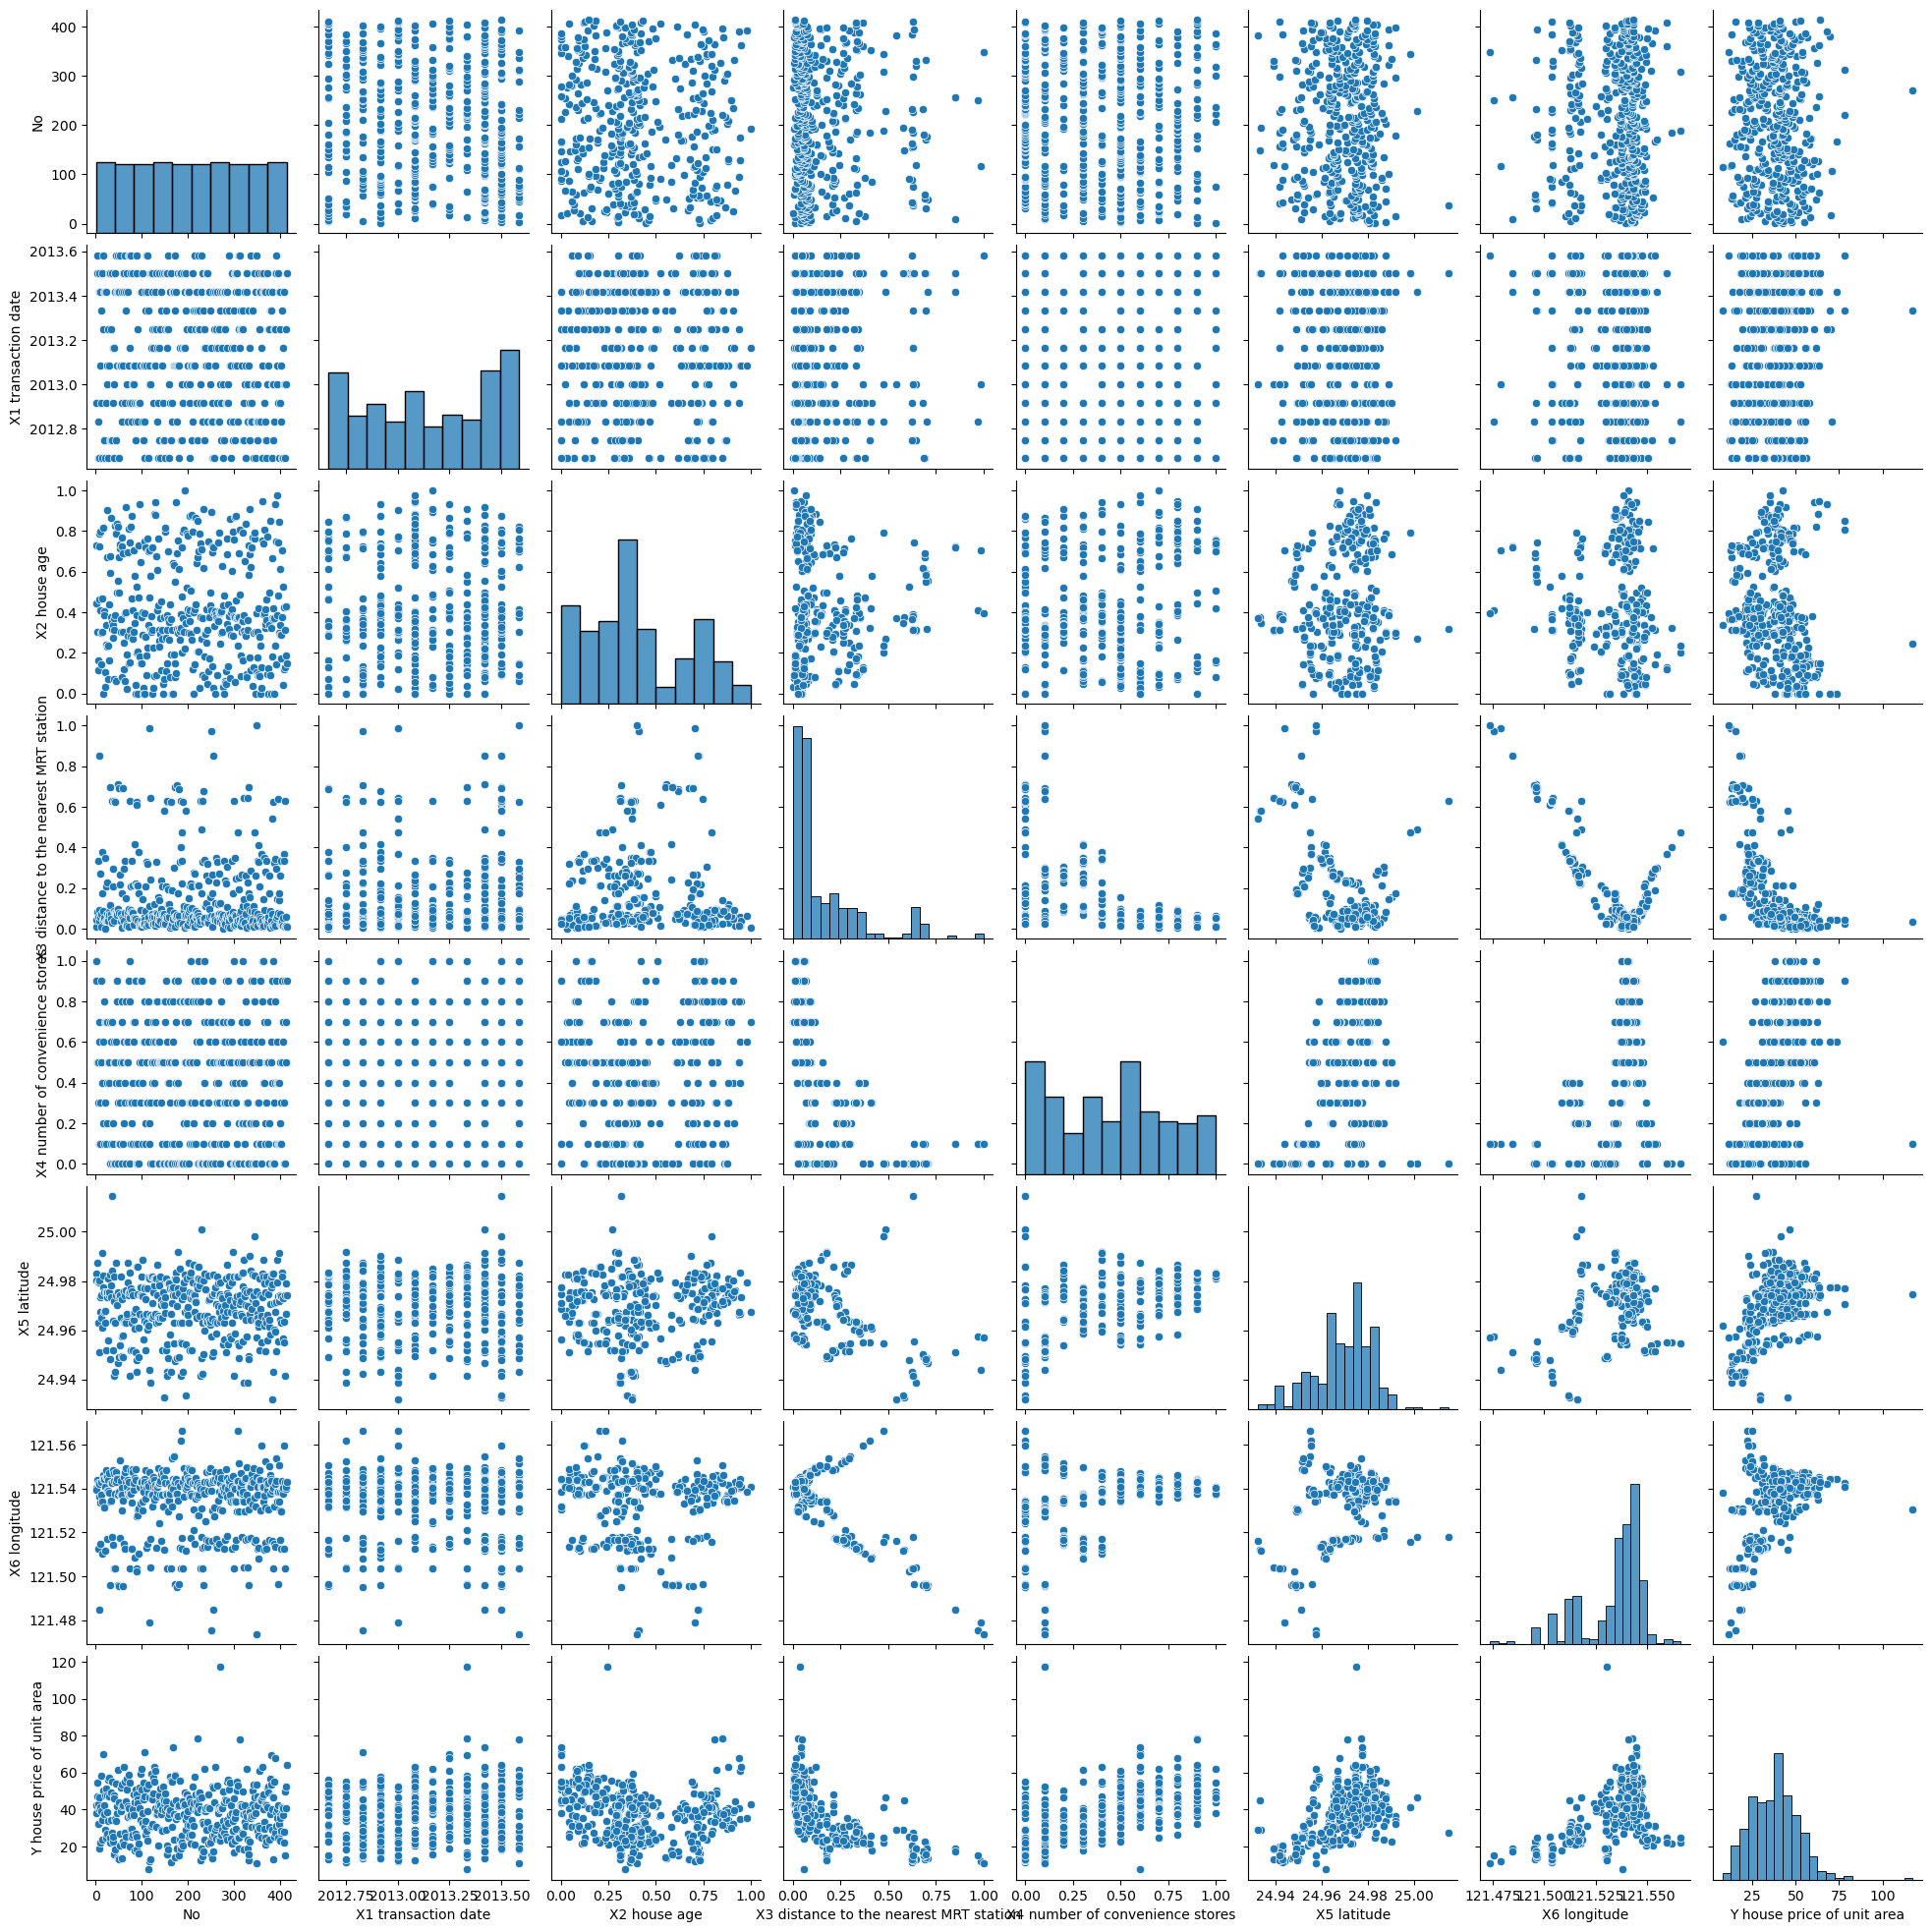

In [90]:
sns.pairplot(df)

In [52]:
from sklearn.model_selection import train_test_split
X = df.drop(['No','Y house price of unit area'], axis=1)
y = df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
ypredlr = lr.predict(X_test)
r2 = r2_score(y_test, ypredlr)
print("R-squared score:", r2)


R-squared score: 0.7774810531151364


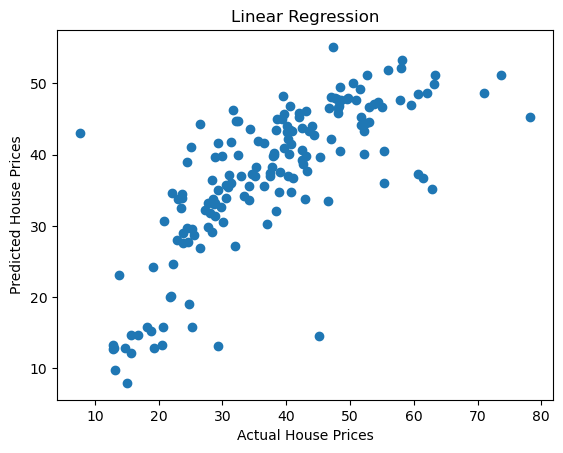

In [45]:
import matplotlib.pyplot as plt
plt.scatter(y_test, ypredlr)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Linear Regression")
plt.show()


In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
ypred_dtr = dtr.predict(X_test)
r2 = r2_score(y_test, ypred_dtr)
print("R-squared score:", r2)


R-squared score: 0.5876148432889685


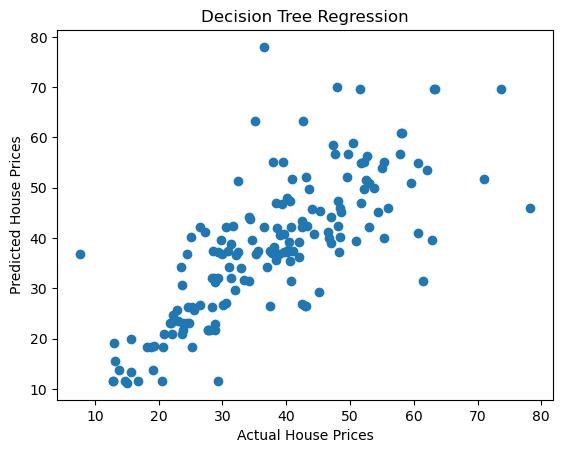

In [47]:
plt.scatter(y_test, ypred_dtr)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Decision Tree Regression")
plt.show()


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
ypred_rfr = rfr.predict(X_test)
r2 = r2_score(y_test, ypred_rfr)
print("R-squared score:", r2)


R-squared score: 0.7943408196207922


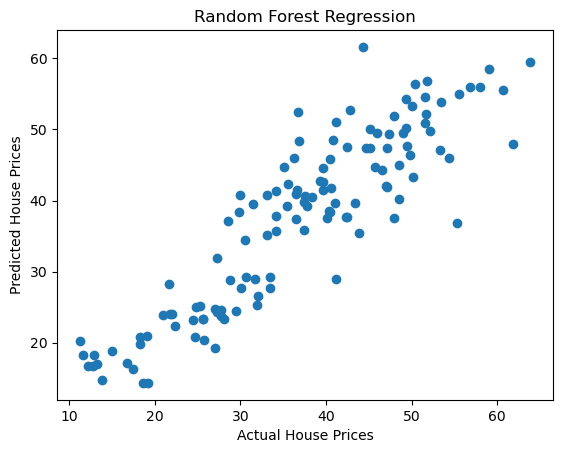

In [56]:
plt.scatter(y_test, ypred_rfr)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Random Forest Regression")
plt.show()


In [65]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(random_state=42)
ransac.fit(X_train, y_train)

ypred_rgr = ransac.predict(X_test)
r2 = r2_score(y_test, ypred_rgr)
print("R-squared score:", r2)

R-squared score: 0.6541580732365069


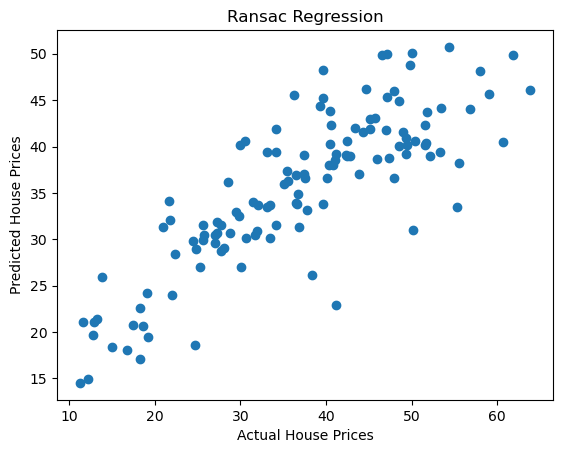

In [71]:
plt.scatter(y_test, ypred_rgr)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Ransac Regression")
plt.show()

In [67]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
X_test_poly = poly.transform(X_test)
ypred_poly = lin_reg.predict(X_test_poly)
r2 = r2_score(y_test, ypred_poly)
print("R-squared score:", r2)

R-squared score: 0.695618130611551


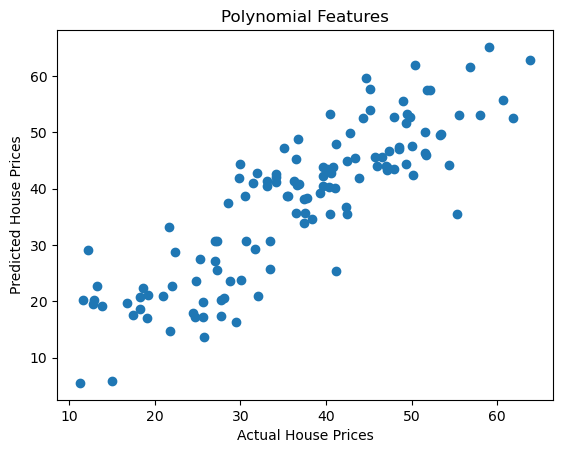

In [69]:
plt.scatter(y_test, ypred_poly)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Polynomial Features")
plt.show()

In [86]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
lr_pipeline = Pipeline([('lin_reg', LinearRegression())])
poly_pipeline = Pipeline([('poly', PolynomialFeatures()), ('lin_reg', LinearRegression())])
dt_pipeline = Pipeline([('dt', DecisionTreeRegressor(random_state=42))])
ransac_pipeline = Pipeline([('ransac', RANSACRegressor())])
rf_pipeline = Pipeline([('rf', RandomForestRegressor(random_state=42))])
lr_params = {}
poly_params = {'poly__degree': [1, 2, 3, 4, 5]}
dt_params = {'dt__max_depth': [2, 3, 4, 5]}
ransac_params = {'ransac__min_samples': [2, 5, 10, 15, 20]}
rf_params = {'rf__n_estimators': [50, 100, 200], 'rf__max_depth': [2, 3, 4, 5]}
pipelines = {'Linear Regression': (lr_pipeline, lr_params),
             'Polynomial Regression': (poly_pipeline, poly_params),
             'Decision Tree Regressor': (dt_pipeline, dt_params),
             'RANSAC Regressor': (ransac_pipeline, ransac_params),
             'Random Forest Regressor': (rf_pipeline, rf_params)}


for pipeline_name, (pipeline, params) in pipelines.items():
    print(f"Performing Grid Search Cross Validation for {pipeline_name}")
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Print the best hyperparameters and corresponding MSE score
    print(f"Best Hyperparameters for {pipeline_name}: ", grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared score for {pipeline_name}: ", r2)
    print("-" * 50)

Performing Grid Search Cross Validation for Linear Regression
Best Hyperparameters for Linear Regression:  {}
R-squared score for Linear Regression:  0.7774810531151364
--------------------------------------------------
Performing Grid Search Cross Validation for Polynomial Regression
Best Hyperparameters for Polynomial Regression:  {'poly__degree': 2}
R-squared score for Polynomial Regression:  0.695618130611551
--------------------------------------------------
Performing Grid Search Cross Validation for Decision Tree Regressor
Best Hyperparameters for Decision Tree Regressor:  {'dt__max_depth': 2}
R-squared score for Decision Tree Regressor:  0.7101152554841816
--------------------------------------------------
Performing Grid Search Cross Validation for RANSAC Regressor
Best Hyperparameters for RANSAC Regressor:  {'ransac__min_samples': 10}
R-squared score for RANSAC Regressor:  0.6046222666688001
--------------------------------------------------
Performing Grid Search Cross Valid

In [ ]:
#Thus we found that Random Forest Regressor has better R-squared score than other regression models. 